<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/notebooks/Classification_digitis_MNIST_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What will we cover today ?


1.   Singular Value Decomposition (SVD)


In [ ]:
import numpy as np
import pandas as pd
# Models (Sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Data and Evaluation packages
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
# visualization
import plotly.express as px
from sklearn.model_selection import train_test_split

# Our Wrapper Class (Can take any model as an input)

In [ ]:
from sklearn.model_selection import cross_val_score

class myClassificationModel:
  def __init__(self, model):
    self.model = model
    self.nb_cv_splits = 10
    self.evaluation_metrics = 'accuracy'

  def train(self, X, y):
    self.model.fit(X, y)

  def evaluate(self, X, y):
    y_predict = self.model.predict(X)
    # return mean_squared_error(y, y_predict)
    return accuracy_score(y, y_predict)

  def cv_score(self, X, y):
    return cross_val_score(self.model,
                           X,
                           y, scoring=self.evaluation_metrics,
                           cv=self.nb_cv_splits)



[Data description](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)

(1797, 64)


<Figure size 640x480 with 0 Axes>

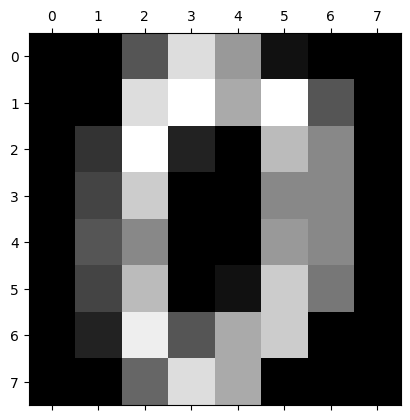

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
from sklearn.datasets import load_digits
df = load_digits(as_frame=True)
print(df.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(df.images[0])
plt.show()
df.keys()

In [ ]:
df.data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

## Unique y values (i.e the labels)

In [ ]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Are the feature values scaled/normalized ?

In [ ]:
X.min(), X.max()

(0.0, 16.0)

## Lets normalize the features.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X)

In [ ]:
X_scaled.min(), X_scaled.max()

(0.0, 1.0)

In [ ]:
# make sure X is scaled
X = X_scaled

# Imporing and fitting the PCA model

In [ ]:
# importing SVD module
from sklearn.decomposition import TruncatedSVD

In [ ]:
# fitting the PCA model
svd = TruncatedSVD(n_components=32)
svd.fit(X)

TruncatedSVD(n_components=32)

In [ ]:
# perform copression
X_compressed = svd.transform(X)
X.shape, X_compressed.shape

((1797, 64), (1797, 32))

In [ ]:
# plotting the per component variances
fig = px.bar(x=np.arange(X_compressed.shape[1]), y=svd.explained_variance_ratio_)
fig.show()
print(np.sum(svd.explained_variance_ratio_))

0.9615182050377196


In [ ]:
X.shape, X_compressed.shape

((1797, 64), (1797, 32))

# Model testing with raw data

In [ ]:
model_repo = {
    'lr': LogisticRegression(),
    'rf': RandomForestClassifier(),
    'gb': GradientBoostingClassifier(),
    'svm': SVC()
}

In [ ]:
# testing a model type
#my_model = myClassificationModel(model_repo['svm'])
my_model = myClassificationModel(model_repo['lr'])

In [ ]:
cv_scores = my_model.cv_score(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.91111111 0.97222222 0.9        0.93333333 0.96111111 0.97222222
 0.97777778 0.96089385 0.88268156 0.94413408]
cross validation score (mean): 0.9415487274984482
cross validation score (std): 0.031848793288462546


# Model testing with compressed data

In [ ]:
cv_scores = my_model.cv_score(X_compressed, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



cross validation scores: [0.91666667 0.97222222 0.9        0.93333333 0.95555556 0.96666667
 0.97777778 0.95530726 0.87709497 0.93296089]
cross validation score (mean): 0.9387585350713842
cross validation score (std): 0.03135745349621055


Advantages:

*   lower std
*   half the data size (so gain in complexity both time and space


# How about plotting the data?
- We will have hard time plotting 64D data matrix; right?

In [ ]:
svd = TruncatedSVD(n_components=2)
X_2D = svd.fit_transform(X)

In [ ]:
X_2D.shape

(1797, 2)

In [ ]:
df_2D = pd.DataFrame({'f1':X_2D[:,0],
                      'f2':X_2D[:,1],
                      'y':y})
df_2D.head(2)

,f1,f2,y
0,2.880979,0.064788,0
1,3.469059,0.370334,1


In [ ]:
fig = px.scatter(df_2D, x="f1", y="f2", color="y",
                 title="String 'y(digits)' values mean discrete colors")

fig.show()